# Analysis of Video Game sales 

### Let's start by importing the necessary libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as kmeans
import statsmodels.api as sm


After importing the neccessary libraries,  I will go ahead and import my dataset into my notebook for cleaning and EDA

In [8]:
vg_sales = pd.read_csv('vgsales.csv')

Let's get a glimpse of how the dataset looks.

In [9]:
vg_sales.head()
vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


I will go ahead and check for missing values

In [8]:
missing_values = vg_sales.isnull().sum()
print(missing_values)

Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


From the above result, it is obvious we have 271 rows with missing values in the year column and 58 row of missing values in the publisher column.
Since, I have limited information about the background of the dataset, i can not flash fill, so i will just drop the rows with missing values.

In [16]:
vg_sales = vg_sales.dropna(subset=['Year', 'Publisher'])

Let me check for duplicates

In [10]:
duplicates = vg_sales[vg_sales.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []


I will quickly check the shape of my dataset(that is, the number of rows and columns therein)

In [17]:
print('We have', vg_sales.shape[0], 'rows in the entire dataset')
print('We have', vg_sales['Name'].nunique(),
      'unique video games in the entire dataset')
print('Also, we have', vg_sales.shape[1], 'columns in the dataset')

We have 16291 rows in the entire dataset
We have 11325 unique video games in the entire dataset
Also, we have 11 columns in the dataset


# NOW, THE EXPLORATIVE DATA ANALYSIS



## Sale Analysis

Top 10 best selling video games globally

In [ ]:
vg_sales[['Name', 'Platform', 'Year', 'Publisher',
      'Global_Sales']].head(10).sort_values(by='Global_Sales', ascending=False)


,Name,Platform,Year,Publisher,Global_Sales
0,Wii Sports,Wii,2006,Nintendo,82.74
1,Super Mario Bros.,NES,1985,Nintendo,40.24
2,Mario Kart Wii,Wii,2008,Nintendo,35.82
3,Wii Sports Resort,Wii,2009,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Nintendo,31.37
5,Tetris,GB,1989,Nintendo,30.26
6,New Super Mario Bros.,DS,2006,Nintendo,30.01
7,Wii Play,Wii,2006,Nintendo,29.02
8,New Super Mario Bros. Wii,Wii,2009,Nintendo,28.62
9,Duck Hunt,NES,1984,Nintendo,28.31


### Let's run down our analysis of regional sales by Genre and platform

In [45]:
Region_sales = vg_sales[[
    'Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'
]]


def top_n_platforms(df, region_col, sales_col, n=5):
    return df.loc[df.groupby(region_col)[sales_col].nlargest(
        n).index.get_level_values(1)]

In [46]:
top_platforms_in_NA_Region = top_n_platforms(Region_sales,
                                             'Platform',
                                             'NA_Sales',
                                             n=5)
top_platforms_in_EU_Region = top_n_platforms(Region_sales,
                                             'Platform',
                                             'EU_Sales',
                                             n=5)
top_platforms_in_JP_Region = top_n_platforms(Region_sales,
                                             'Platform',
                                             'JP_Sales',
                                             n=5)
top_platforms_in_Other = top_n_platforms(Region_sales,
                                         'Platform',
                                         'Other_Sales',
                                         n=5)

print("Top Platforms with Highest Sales in Different Regions:")
print("NA Region:")
print(top_platforms_in_NA_Region[['Platform', 'NA_Sales']])
print("\nEU Region:")
print(top_platforms_in_EU_Region[['Platform', 'EU_Sales']])
print("\nJP Region:")
print(top_platforms_in_JP_Region[['Platform', 'JP_Sales']])
print("\nOther Regions:")
print(top_platforms_in_Other[['Platform', 'Other_Sales']])

Top Platforms with Highest Sales in Different Regions:
NA Region:
    Platform  NA_Sales
89      2600      7.28
239     2600      4.21
258     2600      4.00
544     2600      2.56
734     2600      2.06
..       ...       ...
101     XOne      4.52
193     XOne      3.21
197     XOne      2.66
260     XOne      2.64
287     XOne      2.45

[142 rows x 2 columns]

EU Region:
    Platform  EU_Sales
89      2600      0.45
258     2600      0.26
239     2600      0.24
544     2600      0.17
734     2600      0.12
..       ...       ...
416     XOne      2.11
101     XOne      2.09
197     XOne      2.01
193     XOne      1.53
760     XOne      1.41

[142 rows x 2 columns]

JP Region:
     Platform  JP_Sales
89       2600      0.00
239      2600      0.00
258      2600      0.00
544      2600      0.00
734      2600      0.00
...       ...       ...
494      XOne      0.04
260      XOne      0.03
439      XOne      0.03
1018     XOne      0.03
378      XOne      0.02

[142 rows x 2 columns

Count of Unique games per Publisher (First 10 rows)

In [32]:
vg_sales.groupby('Publisher')[['Name'
                           ]].nunique().sort_values(by='Name',
                                                    ascending=False).head(10)


,Name
Publisher,
Namco Bandai Games,774
Nintendo,662
Konami Digital Entertainment,634
Sony Computer Entertainment,621
Electronic Arts,605
Ubisoft,571
Sega,477
Activision,414
THQ,406


Count of games Per year

In [39]:
Amount_by_pub = vg_sales.groupby(
    'Year')['Publisher'].value_counts().reset_index('Year')
Amount_by_pub.columns = ['Year', 'Amount']
Amount_by_pub.reset_index(inplace=True)
Amount_by_pub

,Publisher,Year,Amount
0,Activision,1980,5
1,Atari,1980,4
2,Atari,1981,11
3,Mattel Interactive,1981,7
4,Activision,1981,6
...,...,...,...
2316,Atari,2016,1
2317,Astragon,2016,1
2318,Sega,2017,2
2319,Idea Factory,2017,1


In [40]:
vg_sales[['Name', 'Platform', 'Year', 'Publisher',
      'Global_Sales']].head(10).sort_values(by='Global_Sales', ascending=False)


,Name,Platform,Year,Publisher,Global_Sales
0,Wii Sports,Wii,2006,Nintendo,82.74
1,Super Mario Bros.,NES,1985,Nintendo,40.24
2,Mario Kart Wii,Wii,2008,Nintendo,35.82
3,Wii Sports Resort,Wii,2009,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Nintendo,31.37
5,Tetris,GB,1989,Nintendo,30.26
6,New Super Mario Bros.,DS,2006,Nintendo,30.01
7,Wii Play,Wii,2006,Nintendo,29.02
8,New Super Mario Bros. Wii,Wii,2009,Nintendo,28.62
9,Duck Hunt,NES,1984,Nintendo,28.31


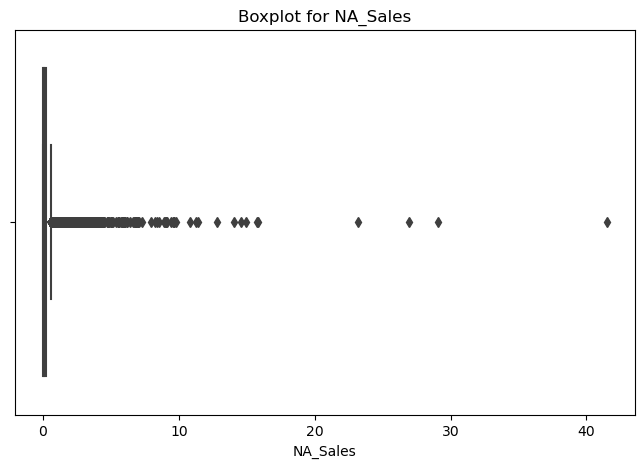

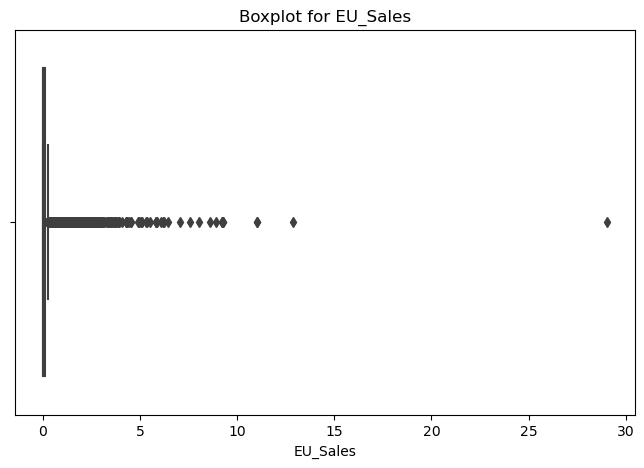

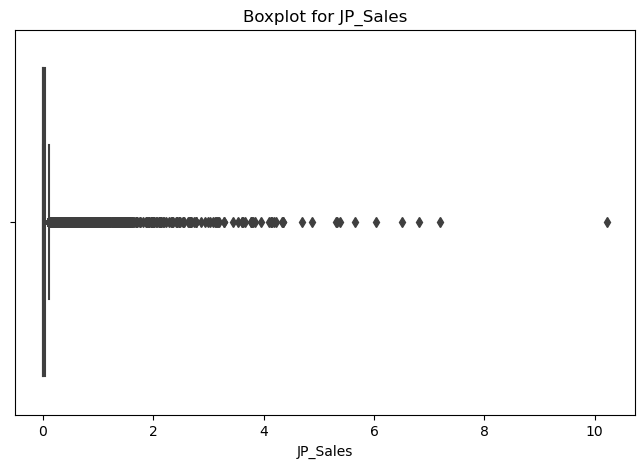

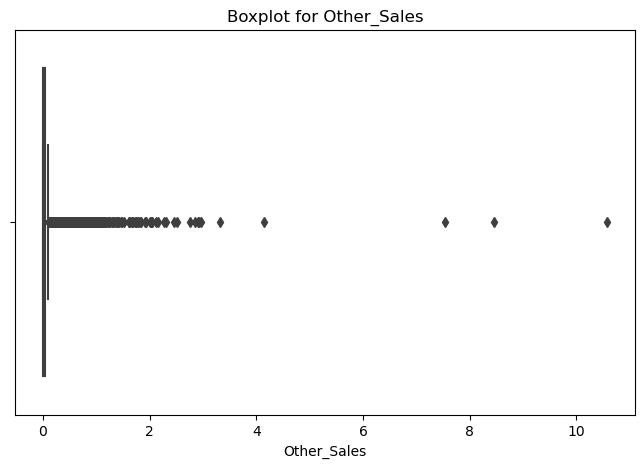

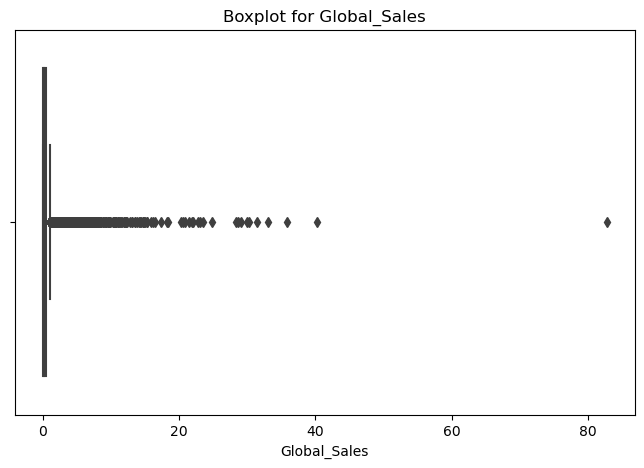

In [16]:
numerical_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=vg_sales[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

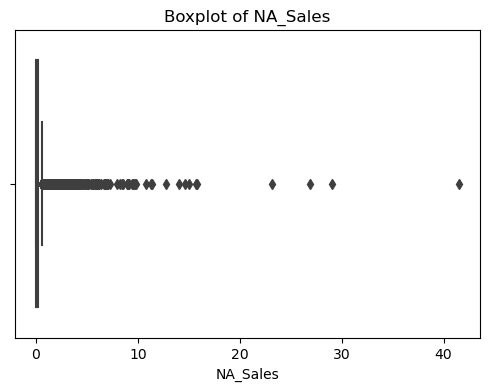

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=vg_sales['NA_Sales'])
plt.title('Boxplot of NA_Sales')
plt.show()